# Comparing ANN and CNN for Image Classification

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


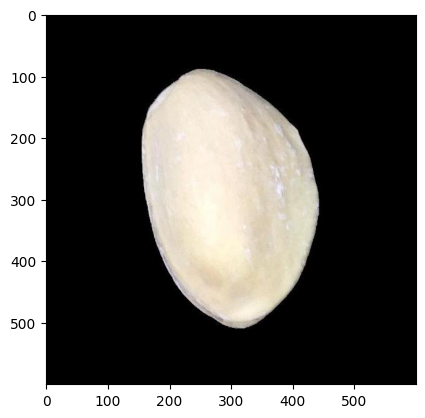

In [3]:
img = plt.imread(r"/content/drive/MyDrive/Sixth Semester/INT407 MACHINE LEARNING LABORATORY/Pistachio_Image_Dataset/Pistachio_Image_Dataset/Pistachio_Image_Dataset/Train/Siirt_Pistachio/siirt 1.jpg")
plt.imshow(img)

In [4]:
train = ImageDataGenerator(1/255)
test = ImageDataGenerator(1/255)

### Loading the Train and Test Dataset


In [5]:
train_dataset = train.flow_from_directory(r"/content/drive/MyDrive/Sixth Semester/INT407 MACHINE LEARNING LABORATORY/Pistachio_Image_Dataset/Pistachio_Image_Dataset/Pistachio_Image_Dataset/Train",
                                          target_size=(32, 32), class_mode='binary')
test_dataset = train.flow_from_directory(r'/content/drive/MyDrive/Sixth Semester/INT407 MACHINE LEARNING LABORATORY/Pistachio_Image_Dataset/Pistachio_Image_Dataset/Pistachio_Image_Dataset/Test',
                                          target_size=(32, 32), class_mode='binary')

Found 2039 images belonging to 2 classes.
Found 115 images belonging to 2 classes.


## ANN

In [6]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32, 32, 3)),
    layers.Dense(1000, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [7]:
ann.compile(optimizer='adam', loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

In [8]:
ann.fit(train_dataset)

/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


64/64 [==============================] - 728s 11s/step - loss: 3.0885 - accuracy: 0.5733


In [9]:
ann.evaluate(test_dataset)

4/4 [==============================] - 30s 10s/step - loss: 0.6918 - accuracy: 0.5652


[0.6918197870254517, 0.5652173757553101]

## CNN

In [10]:
cnn = models.Sequential([
    layers.Conv2D(filters= 64,kernel_size=(3, 3), activation='relu', input_shape = (32, 32, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [11]:
cnn.compile(optimizer='adam', loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

In [12]:
cnn.fit(train_dataset)

64/64 [==============================] - 22s 318ms/step - loss: 1.8862 - accuracy: 0.7249


In [13]:
cnn.evaluate(test_dataset)

4/4 [==============================] - 1s 209ms/step - loss: 0.3543 - accuracy: 0.8522


[0.35427147150039673, 0.852173924446106]

We can clearly see that the loss for CNN is much smaller then ANN .Also accuracy for CNN is bette then ANN. More importantly the computation was also better for CNN compared to ANN for this dataset